## 1. Import the libraries and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/heart.csv")

## 2. Display Top 5 Rows of The Dataset

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex
- chest pain type (4 values)
    - value 0: typical angina
    - value 1: atypical angina
    - value 2: non-anginal pain
    - value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestrol in mg/dl
- fbs: (fasting blood sugar> 120 mg/dl)(1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - value 0: normal
    - value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of> 0.05 mV)
    - value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1=yes; 0=no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - value 1: upsloping
    - value 2: flat
    - value 3: downloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 0=less chance of heart attack, 1 = more chance of heart attack

## 3. Check the last 5 rows of the dataset

In [5]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## 4. Find shape of our dataset (number of rows and number of columns)

In [6]:
data.shape

(1025, 14)

In [7]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  1025
Number of columns:  14


## 5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 6. Check Null Values In The Dataset

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 7. Check For Duplicate Data and Drop Them

In [10]:
data_dup = data.duplicated().any()
print(data_dup)

# if output is True, there's some duplicates

True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(302, 14)

## 8. Get Overall Statistics About The Dataset

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 9. Draw Correlation Matrix

<Axes: >

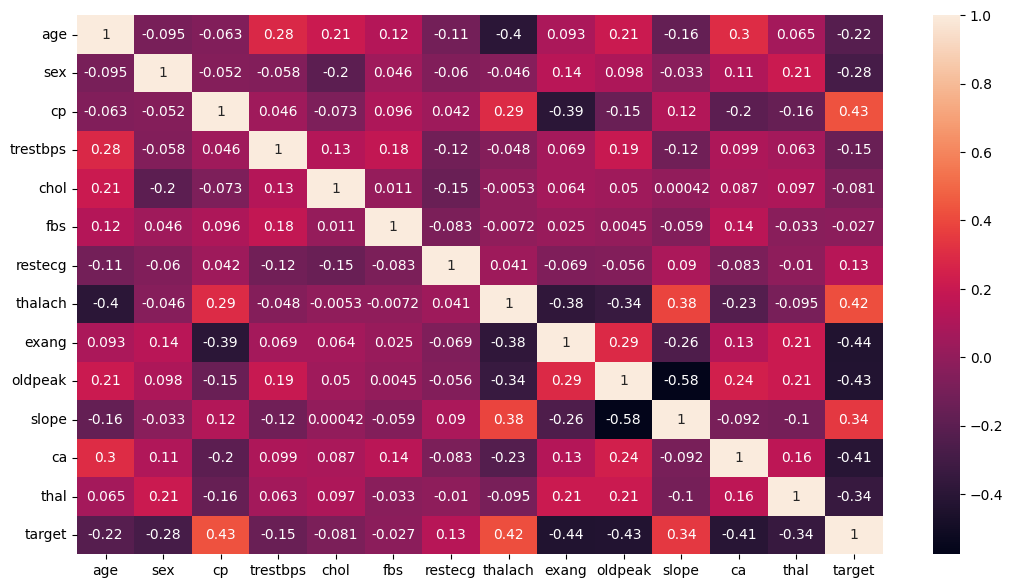

In [14]:
# to check correlation between different features available in our dataset

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), annot=True)

# data.corr()
# sns.heatmap()
# plt.figure(figsize=(1y7,6))
# annot=True - parameter of this heatmap method of seaborn

## 10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [15]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data['target'].value_counts()

# value_counts() - returns count of unique values in a column in descending order

1    164
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

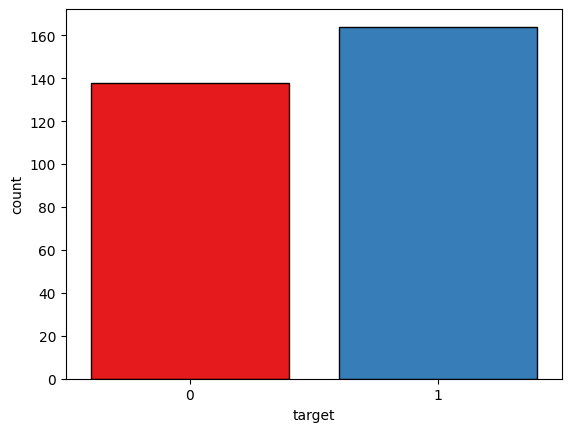

In [17]:
sns.countplot(x= data['target'],palette='Set1',saturation=1,edgecolor='black')

# 1 - heart disease
# from this count plot it is clear that half of the people have heart disease

## 11. Find Count of  Male & Female in this Dataset

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

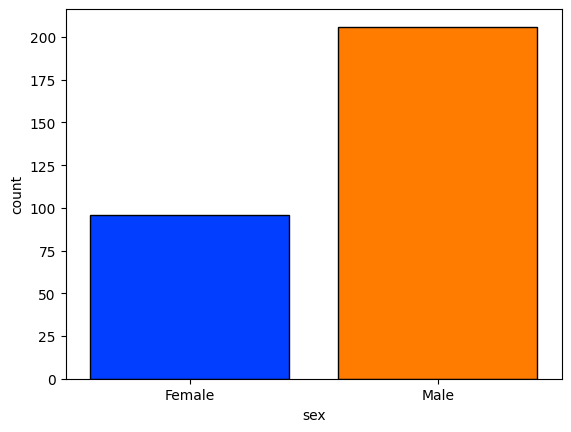

In [20]:
# use countplot to visualize it

sns.countplot(x = data['sex'],palette='bright',saturation=1,edgecolor='black')

# let me change this x labeLS. [0,1] is replaced by ['Female','Male']

plt.xticks([0,1],['Female','Male'])
plt.show()

In [21]:
# from this count plot it is clear that, approximately 30% of people are female and 70% are male.

## 12. Find Gender Distribution According to The Target Variable

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

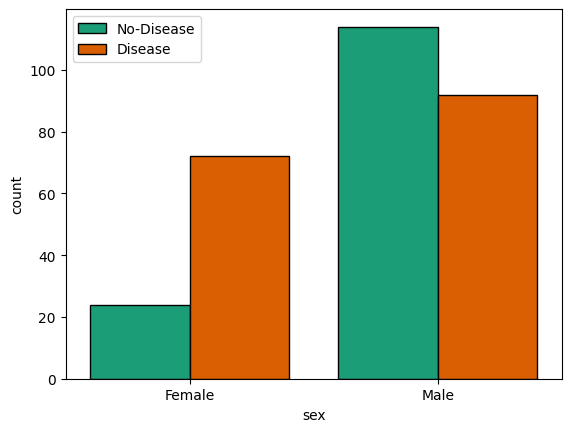

In [23]:
# use "countplot" for distribution

sns.countplot(x='sex',hue='target',data=data,palette='Dark2',saturation=1,edgecolor='black')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

In [24]:
# from this count plot, there are more men for disease and non-disease target.

## 13. Check Age Distribution In The Dataset

<ipython-input-87-a67afe2207c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=25,color='blue')


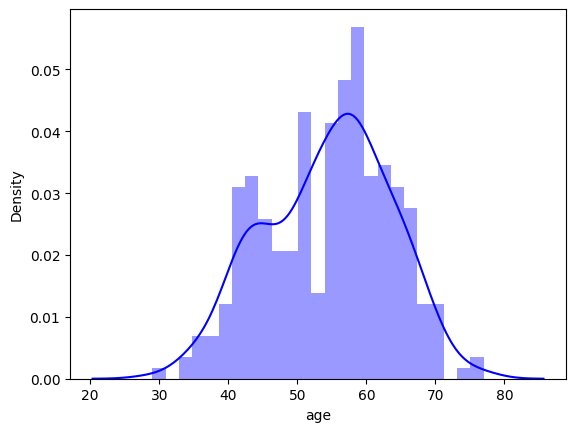

In [87]:
sns.distplot(data['age'],bins=25,color='blue')
plt.show()

In [26]:
# from this plot we can see that most of the people in this study aged between 50-60

## 14. Which Check Chest Pain Type is More Common

- chest pain type (4 values)
    - value 0: typical angina
    - value 1: atypical angina
    - value 2: non-anginal pain
    - value 3: asymptomatic

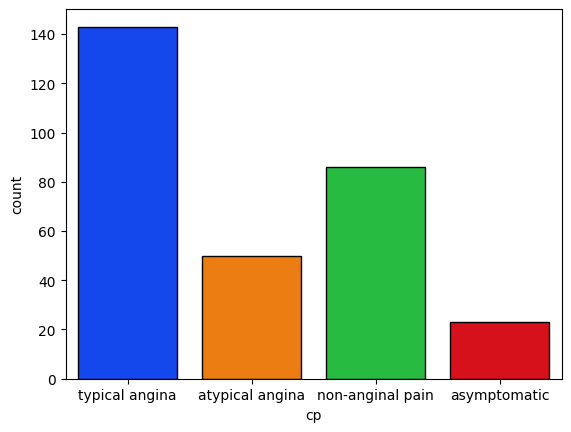

In [79]:
sns.countplot(x= data['cp'],palette='bright',saturation=0.85,edgecolor='black')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=0)
plt.show()
# Typical angina is more common type of chest pain

## 15. Show The Chest Pain Distribution As Per Target Variable

In [28]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

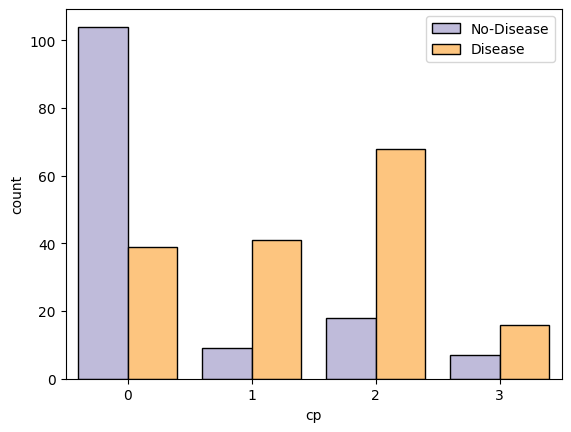

In [81]:
sns.countplot(x='cp',hue='target', data=data,edgecolor='black',palette='PuOr_r',saturation=1)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

In [30]:
# from this graph we can see that healthy people also have chest pain.
# chest pain can be subjective. Due to stress, physical activities etc.
# it varies between gender

## 16. Show Fasting Blood Sugar Distribution According To Target Variable

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

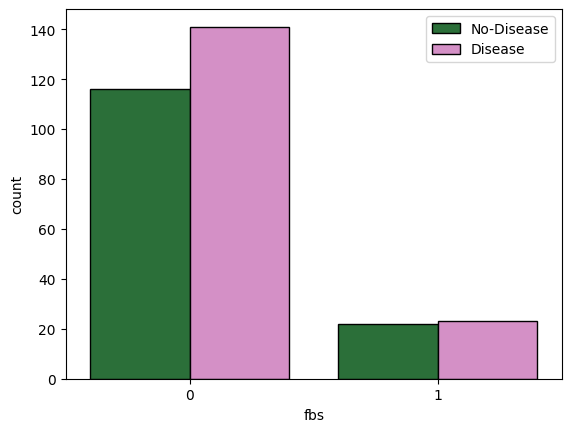

In [71]:
sns.countplot(x='fbs',hue='target',data=data,edgecolor='black',palette='cubehelix',saturation=1)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# fbs is a diabetic indicator
# fbs greater than 120 are diabetics
# higher number of diabetics patient without heart disease

## 17.  Check Resting Blood Pressure Distribution

In [33]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

array([[<Axes: title={'center': 'trestbps'}>]], dtype=object)

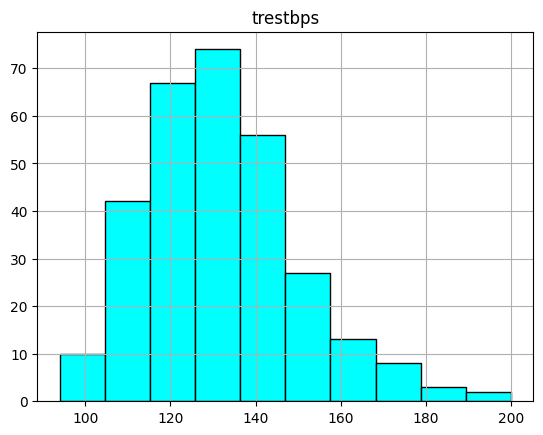

In [82]:
# lets create a histogram

data.hist(['trestbps'],color='cyan',edgecolor='black')

# from this histogram we can see that the blood pressure of the people in this study is between 120 and 140

## 18. Compare Resting Blood Pressure As Per Sex Column

In [35]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


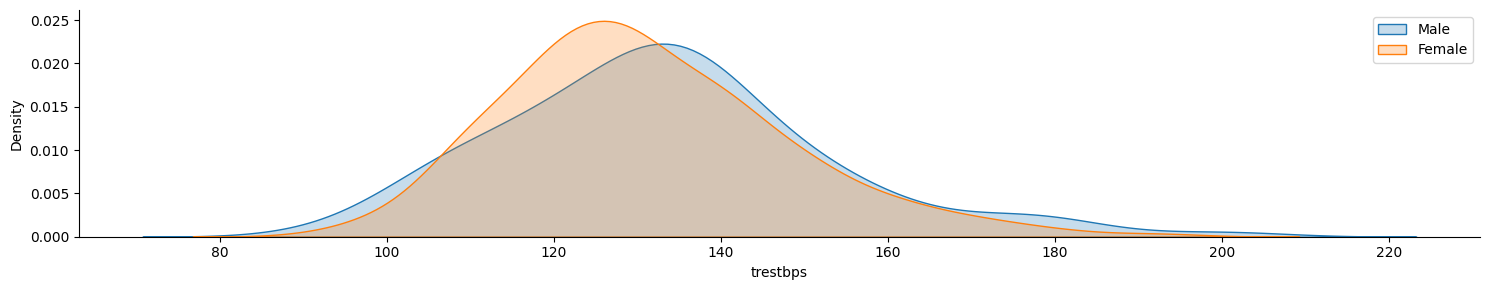

In [65]:
# lets use "facetgrade class"
# facetgrade class is useful when you want to visualize the distribution of variable or the relationship between multiple variables separately, within subset of your dataset.

g = sns.FacetGrid(data,hue="sex", aspect=5)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

# we're using kdeplot of seaborn
# we have to compare Resting BP as per sex column. so we have to pass "Resting Blood Pressure" column. Here it is trestbps

In [37]:
# woman has lower Resting blood pressure compared to men.
# for women os around 120, while for men it is little less than 140

## 19. Show Distribution of Serum cholesterol

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

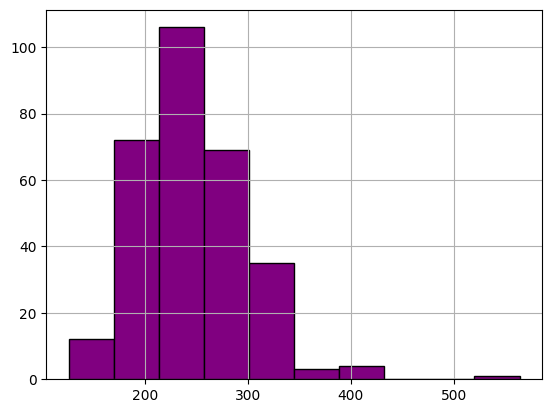

In [85]:
# we are using histogram to check distribution of the column

data['chol'].hist(color='purple',edgecolor='black')

## 20. Plot Continuous Variables

In [40]:
# in this question, we are gonna plot continuous variables.
# first we have to separate columns which contain continuous values and which contains categorical values.


In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
# lets create to empty list.

categ_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        categ_val.append(column)
    else:
        cont_val.append(column)

In [43]:
categ_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [44]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

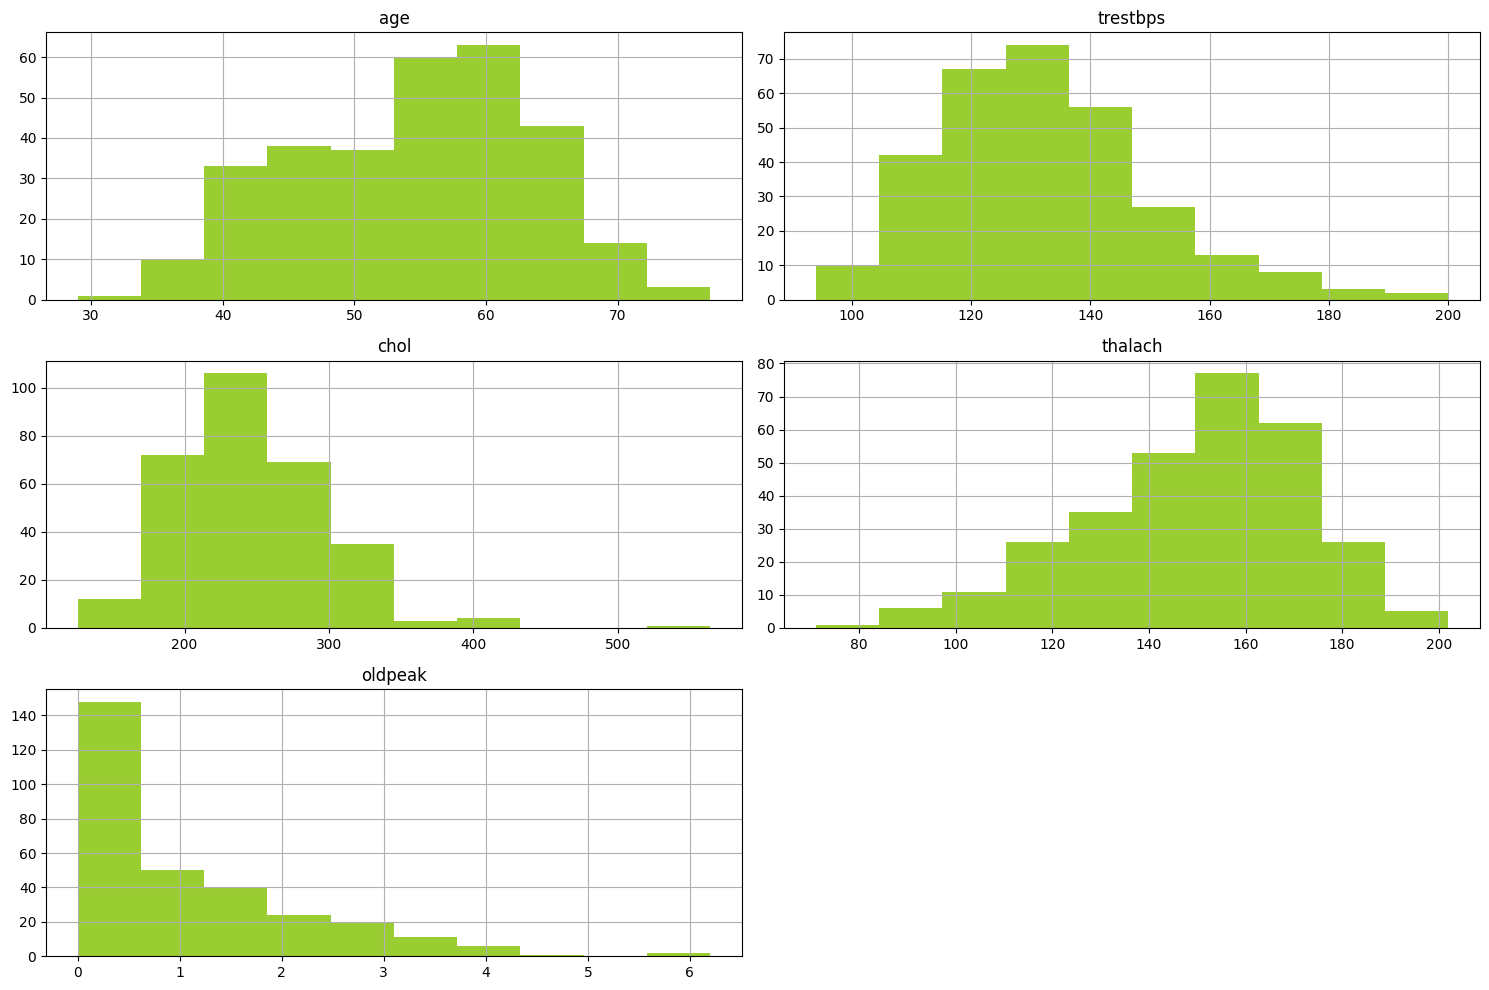

In [76]:
data.hist(cont_val,figsize=(15,10),color='yellowgreen')
plt.tight_layout()
plt.show()